# Customer Segmentation and Discount Personalization

## Introduction
This project aims to segment customers based on their purchasing behaviour to personalize discount offers. <br>
The dataset used is the "Online Retail" dataset from the UCI Machine Learning Repository. <br>
The analysis will focus on using past behavior as the basis for segmentation.

## Data Loading and Exploration
I will load the first 1000 rows of the dataset from the Excel file to get a sense of the data and perform and initial exploration.

In [1]:
import pandas as pd

# Load the first 1000 rows from the Excel file
file_path = 'Online Retail.xlsx'
data_sample = pd.read_excel(file_path, nrows=1000)

# Display the first few rows of the sample data
data_sample.head()

# Display basic information about the sample dataset
data_sample.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    1000 non-null   object        
 1   StockCode    1000 non-null   object        
 2   Description  999 non-null    object        
 3   Quantity     1000 non-null   int64         
 4   InvoiceDate  1000 non-null   datetime64[ns]
 5   UnitPrice    1000 non-null   float64       
 6   CustomerID   999 non-null    float64       
 7   Country      1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


## Data Cleaning
I will clean the dataset by handling missing vlaues and removing duplicates.

In [2]:
# Remove rows with missing CustomerID
data_clean = data_sample.dropna(subset=['CustomerID'])

# Remove duplicates
data_clean = data_clean.drop_duplicates()

# Display the cleaned dataset information
data_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 976 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    976 non-null    object        
 1   StockCode    976 non-null    object        
 2   Description  976 non-null    object        
 3   Quantity     976 non-null    int64         
 4   InvoiceDate  976 non-null    datetime64[ns]
 5   UnitPrice    976 non-null    float64       
 6   CustomerID   976 non-null    float64       
 7   Country      976 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 68.6+ KB


## Feature Engineering
I will create features to capture past purchasing behavior, such as total spending and number of purchases.

In [4]:
# Create total spending feature
data_clean['TotalSpending'] = data_clean['Quantity'] * data_clean['UnitPrice']

# Aggregate the data to create customer-level features
customer_features = data_clean.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',    # Number of unique invoices
    'TotalSpending': 'sum',    # Total spending
}).reset_index()

# Rename columns for clarity
customer_features.columns = ['CustomerID', 'NumPurchases', 'TotalSpending']

# Display the first few rows of the customer features
customer_features.head()

,CustomerID,NumPurchases,TotalSpending
0,12431.0,1,358.25
1,12583.0,1,855.86
2,12791.0,1,192.60
3,12838.0,1,390.79
4,13047.0,3,366.63


## Customer Segmentation
I will segment customers into distinct groups based on their past purchasing behaviour

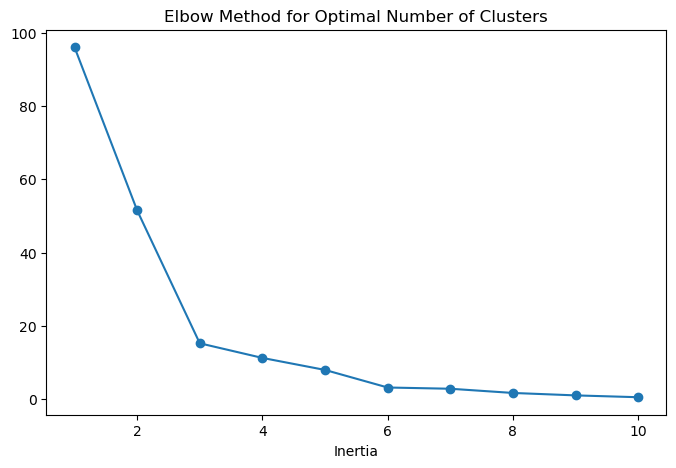

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X = customer_features[['NumPurchases', 'TotalSpending']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker = 'o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.xlabel('Inertia')
plt.show()


In [7]:
from sklearn.cluster import KMeans

# Apply K-means clustering with the chosen number of clusters
optimal_clusters = 3 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the first few rows of the clustered data
customer_features.head()

,CustomerID,NumPurchases,TotalSpending,Cluster
0,12431.0,1,358.25,0
1,12583.0,1,855.86,0
2,12791.0,1,192.60,0
3,12838.0,1,390.79,0
4,13047.0,3,366.63,0


## Analyzing Clusters
Analysing the characteristics of each cluster to understand the differences in customer behavior.

In [8]:
# Analyze the characteristics of each cluster
cluster_analysis = customer_features.groupby('Cluster').agg({
    'NumPurchases': ['mean', 'std'],
    'TotalSpending': ['mean', 'std']
}).reset_index()

# Display the cluster analysis
cluster_analysis

Cluster NumPurchases           TotalSpending            
                  mean       std          mean         std
0       0     1.159091  0.479495    338.804773  223.399067
1       1    10.000000       NaN   1499.340000         NaN
2       2     1.333333  0.577350   2667.533333  952.930967

## Conclusion and Insights
I segmented a sample of cusomers into distinct clusters based on their past purchasing behavior.
The analyses showed three distrinct customer segments:
- Cluster 0 show low freequency and moderate spending. They make about 1 purchase on average.
- Cluster 1 show high frequency and high spending. They make 10 purchases on average
- Cluster 2 show moderate frequency and high spending. They make about 1.33 purchases on average but spend the most on average.

## Potential ways to target different segments
- Cluster 0: Try to increase their purchase frequency through more frequent promotions.
- Cluster 1: Selective discounts to encourage customers to increase average spending, and to maintain or increase their high purchase frequency.
- Cluster 2: Selective discounts to maintain or increase their high spending, and to increase their spending frequency.
